<a href="https://colab.research.google.com/github/AnnaKraim/ML/blob/main/decision_trees_online.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline

from matplotlib import pyplot as plt

import numpy as np

Создадим искусственный датасет и посмотрим на дерево решений для данного датасета

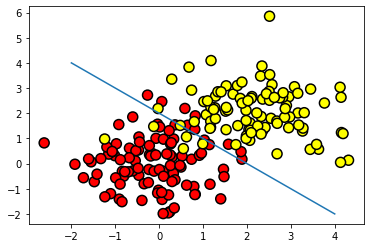

In [ ]:
np.random.seed(42)

# Сгенерировали сто точек
train_data = np.random.normal(size=(100, 2))
# Будем считать что ответ для данных точек - 0
train_labels = np.zeros(100)

# Сегенируем еще 100 точек
train_data = np.r_[train_data, np.random.normal(size=(100, 2), loc = 2)]
# Для них ответ — 1
train_labels = np.r_[train_labels, np.ones(100)]

plt.scatter(train_data[:, 0], train_data[:, 1], c = train_labels, s = 100, cmap='autumn', edgecolors='black', linewidth=1.5)
plt.plot(range(-2, 5), range(4, -3, -1))
plt.show()

Обучим дерево решений на данном датасете и визуализируем ответы

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

clf_tree = DecisionTreeClassifier(criterion='entropy')

clf_tree.fit(train_data, train_labels)

print(accuracy_score(train_labels, clf_tree.predict(train_data)))

1.0


**Решающее дерево склонно к переобучению**

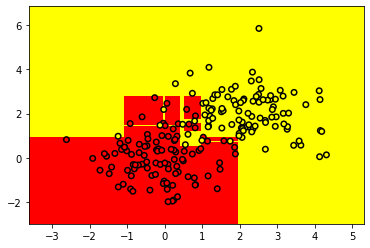

In [ ]:
def get_grid(data):
  x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
  y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
  return np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# Все точки X и Y между нашими точками
xx, yy = get_grid(train_data)

predicted = clf_tree.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.pcolormesh(xx, yy, predicted, cmap='autumn')
plt.scatter(train_data[:, 0], train_data[:, 1], c = train_labels, s = 30, cmap='autumn', edgecolors='black', linewidth=1.5)
plt.show()

Как бороться с переобучением. 

Ответ — использовать кросс-валидацию и использовать гипер-параметры

Основные гипер-параметры для борьбы с переобучением дерева:
1. max_depth — глубина дерева(сколько в нем уровней)
2. min_samples_split - минимальное количество объектов в вершине, при котором вершина начнет разбиение( min_samples_split = 5, то если в вершине осталось меньше 5 объектов, то она не будет разбиваться дальше)
3. min_samples_leaf - минимальное количество объектов, которое должно попасть в каждый лист ПОСЛЕ разибения( min_samples_split = 5, а нода разбивается на 3 и 7 объектов, то разбиения не будет)

### Меняем max_depth

0.955


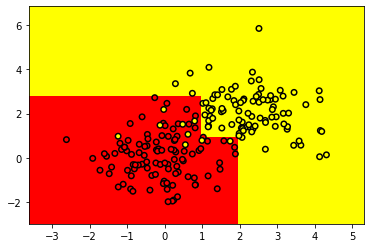

In [ ]:
max_depth = 3

clf_tree = DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)

clf_tree.fit(train_data, train_labels)

print(accuracy_score(train_labels, clf_tree.predict(train_data)))

predicted = clf_tree.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.pcolormesh(xx, yy, predicted, cmap='autumn')
plt.scatter(train_data[:, 0], train_data[:, 1], c = train_labels, s = 30, cmap='autumn', edgecolors='black', linewidth=1.5)
plt.show()

Давайте попробуем визуализировать наше дерево

In [ ]:
from sklearn.tree import export_graphviz

def viz(clf_tree, feature_names):
  export_graphviz(clf_tree, feature_names=feature_names, out_file='tree.dot', filled=True)
  # pip install pydot
  !dot -Tpng 'tree.dot' -o 'tree.png'

In [ ]:
!pip install pydot
!pip install graphviz

In [ ]:
viz(clf_tree, ['x1', 'x2'])

In [ ]:
import graphviz

def viz_inline(clf_tree, fnames, tnames = None):
  dot_data = export_graphviz(clf_tree, feature_names=fnames, out_file=None, class_names=tnames,  filled=True, special_characters=True)
  return graphviz.Source(dot_data)

0.905


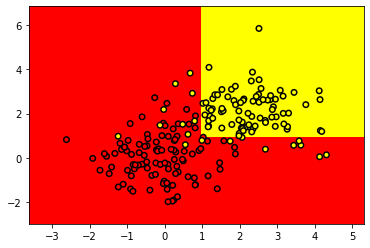

In [ ]:
max_depth = 2

clf_tree = DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)

clf_tree.fit(train_data, train_labels)

print(accuracy_score(train_labels, clf_tree.predict(train_data)))

predicted = clf_tree.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.pcolormesh(xx, yy, predicted, cmap='autumn')
plt.scatter(train_data[:, 0], train_data[:, 1], c = train_labels, s = 30, cmap='autumn', edgecolors='black', linewidth=1.5)
plt.show()

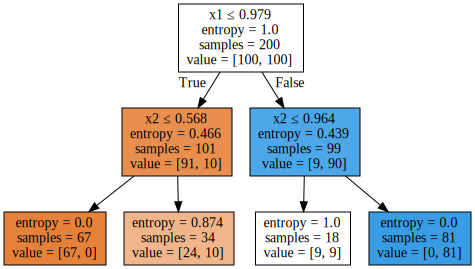

In [ ]:
viz_inline(clf_tree, ['x1', 'x2'])

Посмотрим на другие гипер-параметры

0.96


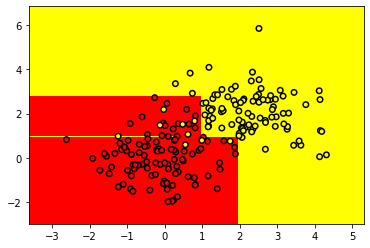

In [ ]:
clf_tree = DecisionTreeClassifier(criterion='entropy', min_samples_split=10)

clf_tree.fit(train_data, train_labels)

print(accuracy_score(train_labels, clf_tree.predict(train_data)))

predicted = clf_tree.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.pcolormesh(xx, yy, predicted, cmap='autumn')
plt.scatter(train_data[:, 0], train_data[:, 1], c = train_labels, s = 30, cmap='autumn', edgecolors='black', linewidth=1.5)
plt.show()

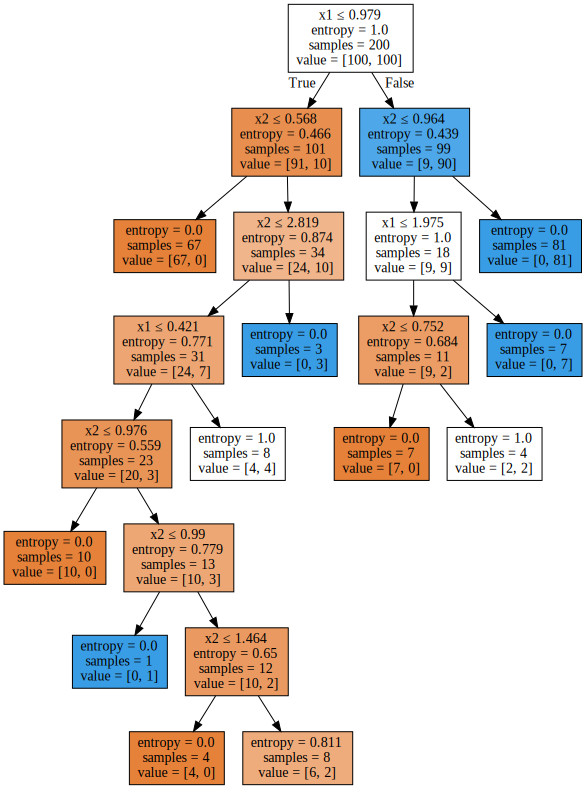

In [ ]:
viz_inline(clf_tree, ['x1', 'x2'])

0.915


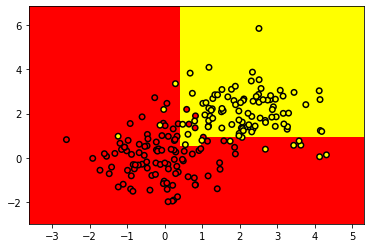

In [ ]:
clf_tree = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=10)

clf_tree.fit(train_data, train_labels)

print(accuracy_score(train_labels, clf_tree.predict(train_data)))

predicted = clf_tree.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.pcolormesh(xx, yy, predicted, cmap='autumn')
plt.scatter(train_data[:, 0], train_data[:, 1], c = train_labels, s = 30, cmap='autumn', edgecolors='black', linewidth=1.5)
plt.show()

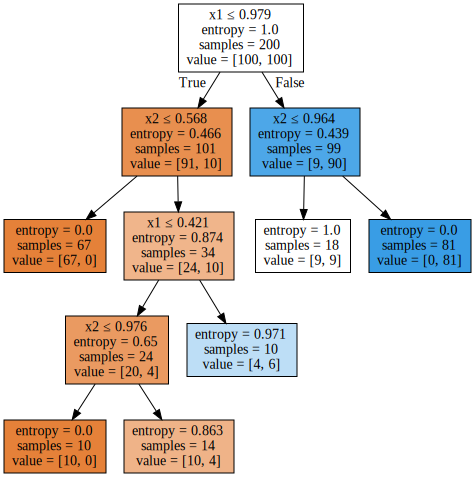

In [ ]:
viz_inline(clf_tree, ['x1', 'x2'])

Ипользуем дерево решений на реальных данных 

Для примера, iris dataset

In [ ]:
import pandas as pd
from sklearn.datasets import load_iris

iris = load_iris()
df = pd.DataFrame(data=np.c_[iris['data'], iris['target']], columns = iris['feature_names'] + ['target', ])


In [ ]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


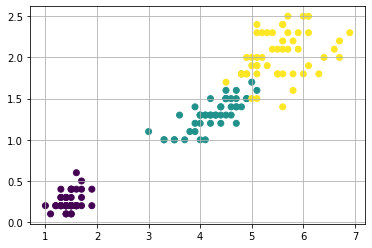

In [ ]:
plt.scatter(df['petal length (cm)'], df['petal width (cm)'], c = df['target'])
plt.grid()
plt.show()

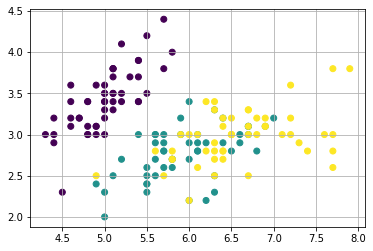

In [ ]:
plt.scatter(df['sepal length (cm)'], df['sepal width (cm)'], c = df['target'])
plt.grid()
plt.show()

In [ ]:
X = df.drop(columns=['target'])
y = df['target']

clf_tree = DecisionTreeClassifier(criterion='entropy')

clf_tree.fit(X, y)

accuracy_score(y, clf_tree.predict(X))

1.0

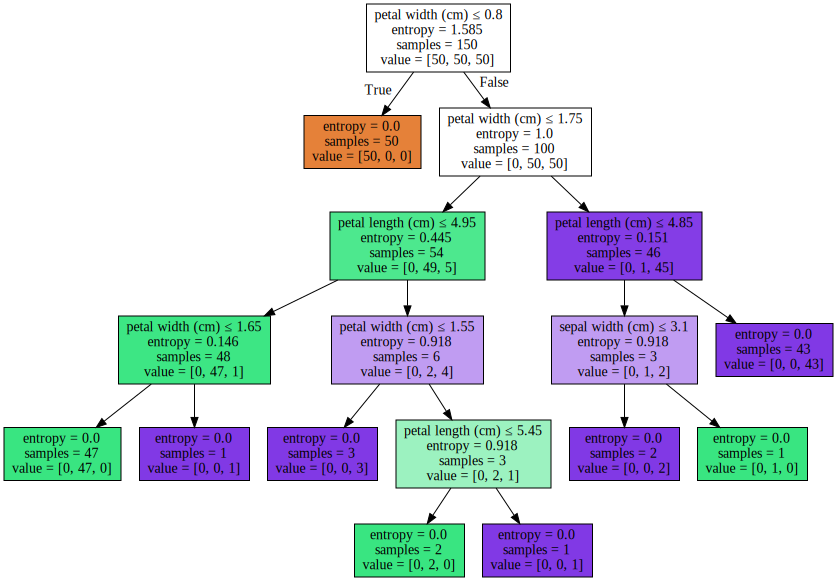

In [ ]:
viz_inline(clf_tree, fnames=X.columns)

Чтобы подтверить слова о переобучении, попробуем использовать кросс-валидацию

In [ ]:
from sklearn.model_selection import cross_val_score, KFold

fold = KFold(n_splits=5, shuffle=True, random_state=42)

cv_score = cross_val_score(DecisionTreeClassifier(criterion='entropy'), X, y, cv = fold)
cv_score.min(), cv_score.mean()

(0.9333333333333333, 0.9600000000000002)

In [ ]:
cv_score = cross_val_score(DecisionTreeClassifier(criterion='entropy', min_samples_leaf=4), X, y, cv = fold)
cv_score.min(), cv_score.mean()

(0.9333333333333333, 0.9666666666666668)

Попробуем найти наилучшие параметры для дерева решений используя gridsearch

In [ ]:
from sklearn.model_selection import GridSearchCV

d_clf = DecisionTreeClassifier()

params = {'max_depth': list(np.arange(1, 10)) + [None, ], 'min_samples_split': np.arange(2, 12), 'min_samples_leaf': np.arange(1, 10)}

gcv = GridSearchCV(d_clf, params, verbose=1, n_jobs=-1)
gcv.fit(X, y)

Fitting 5 folds for each of 900 candidates, totalling 4500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 584 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 4500 out of 4500 | elapsed:   13.1s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, None],
    

In [ ]:
gcv.best_score_, gcv.best_params_

(0.9733333333333334,
 {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2})

Решающее дерево можно интерпретировать, мы можем посмотреть на картинку, но более того, мы можем узнать насколько важный каждый признак

In [ ]:
np.array([gcv.best_estimator_.feature_importances_, X.columns]).T

array([[0.0, 'sepal length (cm)'],
       [0.0, 'sepal width (cm)'],
       [0.5856155514031495, 'petal length (cm)'],
       [0.4143844485968506, 'petal width (cm)']], dtype=object)